PROSES 1: DATA WRANGLING

Ini terdiri dari 3 tahap, yaitu data gathering, data assesing dan data cleaning

1. PROSES GATHERING DATA

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Load dataframe day dengan library pandas

day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
#Load dataframe day dengan library pandas

hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. ASSESING DATA

a. Assesing pada day_df

In [76]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output bisa dilihat tipe data dari kolom "dteday" bukanlah datetime, melainkan object, sehingga hal ini harus diperbaiki

In [77]:
# Memastikan tidak ada missing value pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dari output bisa dilihat tidak ada missing value pada data ini

In [78]:
# Mengecek data yang duplikat pada day_df

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi juga pada day_df

In [79]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df_
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


b. Assesing pada hour_df

In [80]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Dari output bisa dilihat tipe data dari kolom "dteday" bukanlah datetime, melainkan object, sehingga hal ini harus diperbaiki

In [81]:
 # Mengecek data yang duplikat pada hour_df

print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0



Tidak ada duplikasi juga pada hour_df

In [82]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


RANGKUMAN DARI HASIL ASSESING PADA day_df dan hour_df

day_df:
- Tipe data: Terdapat kesalahan tipe data untuk kolom dteday

hour_df:
- Tipe data: Terdapat kesalahan tipe data untuk kolom dteday

3. CLEANING DATA

a. Membersihkan data day_df

In [83]:
# Mengubah tipe data kolom dteday

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [84]:
# Untuk memastikan proses pengubahan tipe data berhasil, kita cek tipe data kolom dteday
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dari output bisa kita lita tipe data kolom dteday sudah berubah menjadi datetime

b. Membersihkan data pada hour_df

In [85]:
# Mengubah tipe data kolom dteday

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [86]:
# Untuk memastikan proses pengubahan tipe data berhasil, kita cek tipe data kolom dteday
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-


Dari output bisa kita lita tipe data kolom dteday sudah berubah menjadi datetime

PROSES 2: EXPLORATORY DATA ANALYSIS

A. Setelah melakukan analisis variabel pada data, dapat didefinisikan beberapa pertanyaan bisnis, yaitu:

1. Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?
2. Kapan permintaan penyewaan sepeda mencapai puncaknya dalam setahun?
3. Bagaimana distribusi penyewaan sepeda selama jam-jam tertentu dalam sehari?

B. EKSPLORASI DATA

1. Eksplorasi data day_df

In [87]:
# Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dengan melihat desripsi dari data day_df, kita bisa mengetahui fungsi dari kolom numerik dan kategori dalam day_df. Untuk kolom numerik, kita dapat melihat nilai seperti rata-rata, standar deviasi, minimum, maksimum, dan kuartil. Sedangkan untuk kolom kategori, kita bisa melihat frekuensi nilai unik, jumlah nilai yang tidak null, dan kategori yang paling sering muncul.

In [88]:
# Melihat persebaran kolom dteday pada day_df
print(day_df['dteday'].min(), day_df['dteday'].max())

2011-01-01 00:00:00 2012-12-31 00:00:00


dari outputnya kita bisa melihat persebaran dari data di kolom dteday adalah bahwa dataset mencakup dua tahun penuh, yaitu 2011 dan 2012.

In [89]:
# Melihat seberapa banyak tanggal yang tidak terisi dalam dataset

day_df['dteday'].value_counts().sort_index(ascending=True)

dteday
2011-01-01    1
2011-01-02    1
2011-01-03    1
2011-01-04    1
2011-01-05    1
             ..
2012-12-27    1
2012-12-28    1
2012-12-29    1
2012-12-30    1
2012-12-31    1
Name: count, Length: 731, dtype: int64

Dari output ini, kita bisa melihat apakah ada hari yang hilang dalam data

In [90]:
# Melihat total sepeda yang disewa berdasarkan musim

day_df.groupby(by='season').cnt.sum().reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


Disini kita bisa melihat season ke-3 memiliki jumlah penyewa terbanyak, diikut season 2, 4 dan 1 sebagai yang paling sedikit

In [91]:
# Melihat total sepeda yang disewa berdasarkan hari dalam seminggu

day_df.groupby(by='weekday').cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


Informasi yang kita dapatkan dimana hari dengan jumlah penyewaan sepeda terbanyak adalah Sabtu (5) dan Jumat (4), sedangkan Senin (0) memiliki jumlah penyewaan sepeda paling sedikit.

In [92]:
# Jumlah total sepeda yang disewa berdasarkan cuaca

day_df.groupby(by='weathersit').cnt.sum().reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


untuk informasi mengenai cuaca, kita bisa melihat cuaca weathersit=1 memiliki jumlah penyewaan sepeda yang jauh lebih tinggi dibandingkan weathersit = 2 dan weathersit =3.

In [93]:
# Melihat jumlah total sewa sepeda berdasarkan tahun
day_df.groupby(by='yr').cnt.sum().reset_index()


,yr,cnt
0,0,1243103
1,1,2049576


Bisa dilihat bagaimana peningkatan jumlah penyewaan sepeda tahun 2012 (year = 1), dengan lebih dari 2 juta penyewaan, dibandingkan dengan tahun 2011 (year = 0).

In [94]:
#Melihat korelasi suhu dengan jumlah penyewa
day_df[['temp', 'cnt']].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


Terdapat korelasi positif yang moderat antara suhu dan jumlah penyewaan sepeda, yang menunjukkan bahwa semakin tinggi suhu, semakin tinggi jumlah penyewaan sepeda. Namun, korelasi ini tidak terlalu kuat, sehingga suhu bukan satu-satunya faktor yang mempengaruhi jumlah penyewaan sepeda.

In [95]:
# Mleihat bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda
# Kita bisa melakukan grouping berdasarkan cuaca

day_df.groupby('weathersit')['cnt'].mean()


weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

Penyewaan sepeda paling banyak terjadi pada (weathersit = 1), diikuti oleh (weathersit = 2). (weathersit = 3) menyebabkan jumlah penyewaan sepeda menurun drastis.

2. Eksplorasi data hour_df

In [96]:
# Melihat total penyewaan sepeda berdasarkan waktu (jam)

hour_df.groupby('hr')['cnt'].sum().reset_index()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


Disini saya menggunakan data berdasarkan kolom hr (jam) dengan function groupby).
Disini kita bisa melihat penyewaan tertinggi itu terjadi pada jam 17 dengan jumlah penyewa 336.860 dan diikuti jam 8 pagi, yaitu sebanyak 261.001.
Ini bisa diasumsikan karena orang banyak melakukan olahraga sore dan olahraga pagi yang sangat ideal dilakukan jam 17 dan 8 pagi tersebut.

In [97]:
# Melihat total penyewaan berdasarkan hari dalam seminggu
# Menggunakan groupby dari kolom weekday dan cnt

hour_df.groupby('weekday')['cnt'].sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


Dari output kita bisa mengambil informasi:
Permintaan sepeda meningkat selama akhir pekan, dengan Jumat dan Sabtu menjadi hari dengan jumlah penyewaan tertinggi.

In [98]:
# Melihat total penyewaan sepeda berdasarkan tahun
hour_df.groupby('yr')['cnt'].sum().reset_index()

,yr,cnt
0,0,1243103
1,1,2049576


Tahun 1 menunjukkan peningkatan jumlah penyewaan sepeda, yang bisa mencerminkan tren pertumbuhan dalam penggunaan sepeda seiring waktu.

In [99]:
# Melihat pengaruh cuaca terhadap penyewaan sepeda
hour_df.groupby('weathersit')['cnt'].mean().reset_index()


,weathersit,cnt
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


Informasi yang didapat
Cuaca cerah (weathersit = 1) menunjukkan penyewaan sepeda tertinggi, dengan rata-rata penyewaan mencapai sekitar 204 sepeda.
Cuaca buruk (weathersit = 4) memiliki penyewaan sepeda terendah, dengan rata-rata hanya sekitar 74 sepeda.
Secara keseluruhan, dapat disimpulkan bahwa cuaca yang lebih baik (terutama cerah) cenderung meningkatkan jumlah penyewaan sepeda, sedangkan cuaca yang buruk (seperti hujan atau angin kencang) menurunkan minat orang untuk menyewa sepeda.

In [100]:
# Melihat pengaruh suhu terhadap penyewaan sepeda
hour_df[['temp', 'cnt']].corr()

,temp,cnt
temp,1.000000,0.404772
cnt,0.404772,1.000000


Korelasi sebesar 0.404772 menunjukkan adanya korelasi positif sedang antara suhu dan jumlah penyewaan sepeda. Ini berarti bahwa semakin tinggi suhu, semakin tinggi pula jumlah penyewaan sepeda, meskipun hubungan ini tidak terlalu kuat.

In [101]:
# Melihat pengaruh hari libur dan hari kerja terhadap penyewaan sepeda
hour_df.groupby('holiday')['cnt'].sum().reset_index()

,holiday,cnt
0,0,3214244
1,1,78435


Disini kita bisa melihat penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.

In [102]:
hour_df.groupby('workingday')['cnt'].sum().reset_index()

,workingday,cnt
0,0,1000269
1,1,2292410


Penyewaan sepeda pada hari kerja (workingday = 1) jauh lebih tinggi daripada pada hari libur (workingday = 0). Ini menunjukkan bahwa pada hari-hari kerja, lebih banyak orang menyewa sepeda, kemungkinan besar untuk aktivitas rutin seperti perjalanan menuju tempat kerja, sekolah, atau aktivitas harian lainnya.

PROSES 3: VISUALISASI DATA 

Visualisasi ini dilakukan untuk menjawab pertanyaan yang telah diidentifikasi tapi sebagai pertanyaan analisis saat tahap EXPLORATORY DATA ANALYSIS.

1. Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?

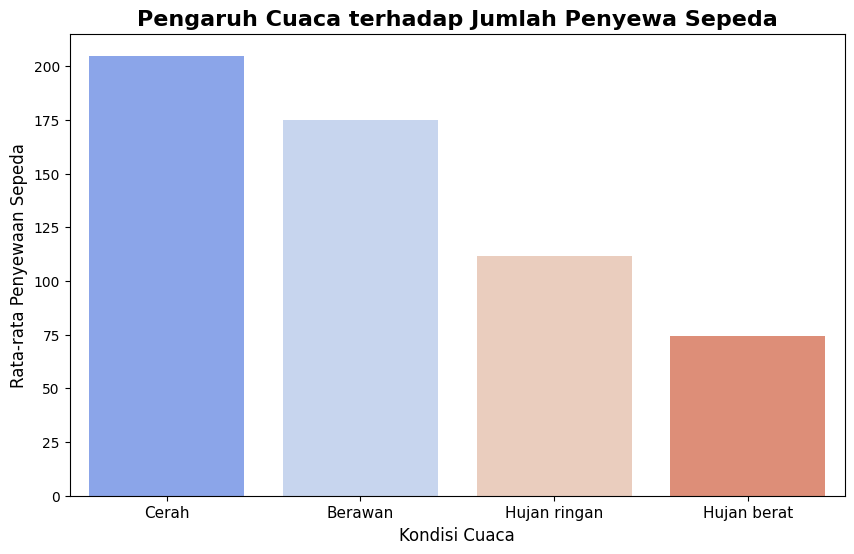

In [103]:
# Perbaikan untuk future warning
plt.figure(figsize=(10, 6))

# Menggunakan palette dengan variabel hue dan menonaktifkan legend
sns.barplot(x='weathersit', y='cnt', data=hour_df, errorbar=None, palette=palette, hue='weathersit', legend=False)

# Menambahkan judul dan label sumbu dengan ukuran dan tebal yang tepat
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda', fontsize=16, fontweight='bold')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)

# Menyesuaikan nilai di sumbu x untuk memberikan penjelasan yang mudah dipahami
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan ringan', 'Hujan berat'], fontsize=11)

# Menampilkan plot
plt.show()


Dari hasil visualisasi kita bisa melihat Penyewaan sepeda tertinggi terjadi pada cuaca yang cerah atau sebagian berawan (weathersit = 1),
sementara kondisi cuaca hujan berat (weathersit = 4) mengakibatkan penurunan cukup signifikan dalam penyewaan.
Cuaca yang cerah atau sebagian berawan memiliki dampak paling positif terhadap jumlah penyewaan sepeda, sedangkan cuaca dengan hujan berat (weathersit = 4) mengurangi penyewaan secara signifikan.

2. Kapan permintaan penyewaan sepeda mencapai puncaknya dalam setahun?

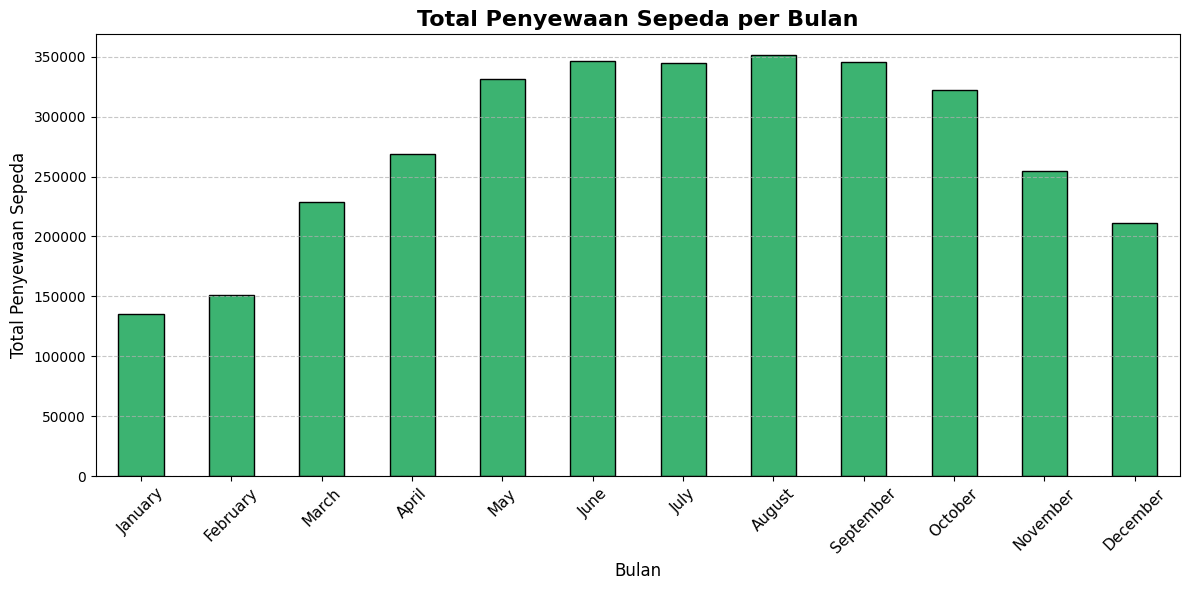

In [104]:
import matplotlib.pyplot as plt
import calendar

# Menyesuaikan ukuran dan tata letak plot
plt.figure(figsize=(12, 6))

# Mengelompokkan dan menghitung total penyewaan sepeda per bulan
monthly_rentals = hour_df.groupby('mnth')['cnt'].sum()

# Membuat plot batang dengan warna lebih menarik
monthly_rentals.plot(kind='bar', color='mediumseagreen', edgecolor='black')

# Mengubah label x-axis menjadi nama bulan, bukan angka
plt.xticks(ticks=range(12), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45, fontsize=11)

# Menambahkan judul dan label sumbu yang lebih informatif
plt.title('Total Penyewaan Sepeda per Bulan', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)

# Menambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


Penyewaan sepeda mencapai puncaknya pada bulan-bulan musim panas (sekitar bulan Juni hingga Agustus). Ini menunjukkan bahwa bulan-bulan dengan cuaca yang lebih hangat menarik lebih banyak penyewa sepeda.

3. Bagaimana distribusi penyewaan sepeda selama jam-jam tertentu dalam sehari?

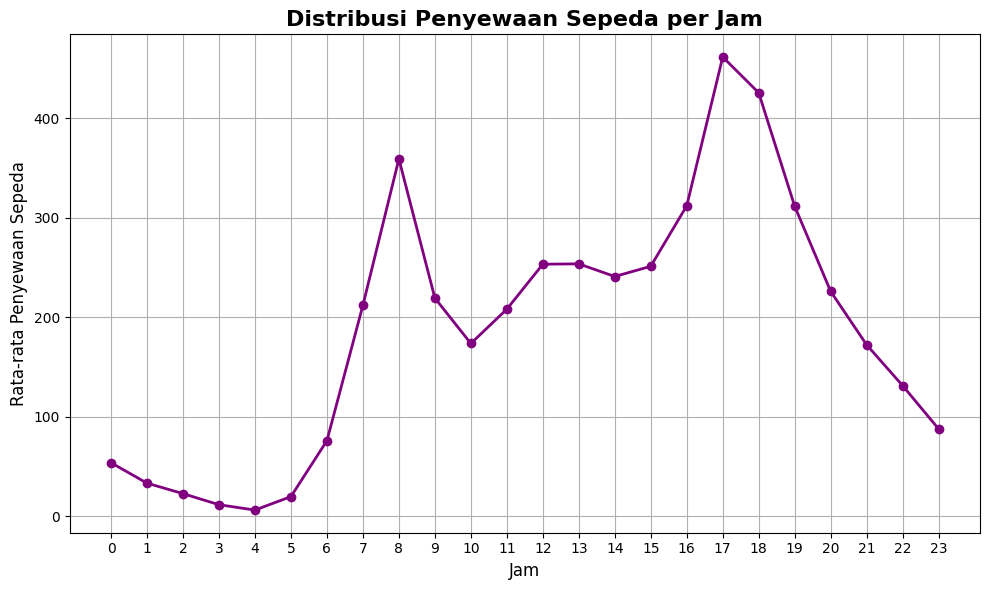

In [105]:
# Menyesuaikan ukuran dan tata letak plot
plt.figure(figsize=(10, 6))

# Menghitung rata-rata penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

# Membuat plot garis dengan titik data (marker) dan warna lebih menarik
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', color='purple', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Penyewaan Sepeda per Jam', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)

# Menambahkan angka pada sumbu x per jam
plt.xticks(range(0, 24))  # Mengatur angka pada sumbu x untuk 24 jam

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menampilkan plot dengan layout yang lebih rapi
plt.tight_layout()
plt.show()


Penyewaan sepeda mencapai puncaknya pada jam 8 pagi dan jam 5 sore, yang mengindikasikan bahwa kebanyakan orang menyewa sepeda selama jam sibuk untuk perjalanan kerja (commuting). Sewa sepeda juga relatif tinggi selama waktu makan siang sekitar jam 12-1 siang.